<a href="https://colab.research.google.com/github/chanjaga/Power-Analysis-Attack/blob/main/%E7%B0%A1%E6%98%93%E7%89%88%E3%80%80%E7%9B%B8%E9%96%A2%E9%9B%BB%E5%8A%9B%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ラウンド鍵1の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

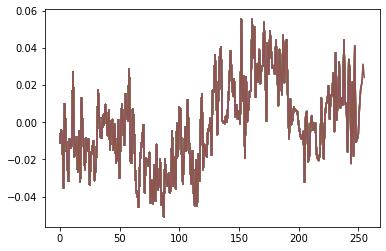

ラウンド鍵(2進):10100001
ラウンド鍵(16進):a1

[ラウンド鍵2の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

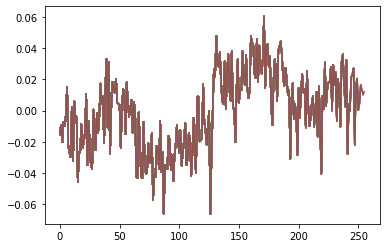

ラウンド鍵(2進):10101011
ラウンド鍵(16進):ab

[ラウンド鍵3の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

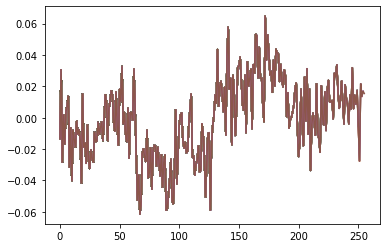

ラウンド鍵(2進):10101100
ラウンド鍵(16進):ac

[ラウンド鍵4の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

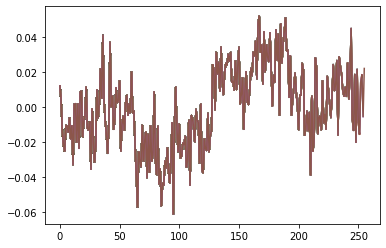

ラウンド鍵(2進):10100111
ラウンド鍵(16進):a7

[ラウンド鍵5の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

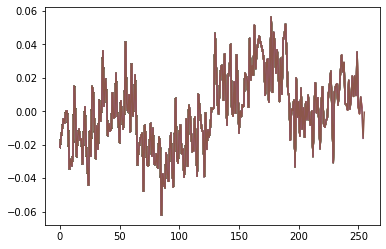

ラウンド鍵(2進):10110001
ラウンド鍵(16進):b1

[ラウンド鍵6の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

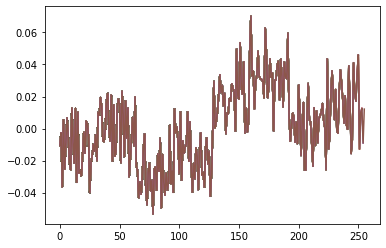

ラウンド鍵(2進):10100000
ラウンド鍵(16進):a0

[ラウンド鍵7の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

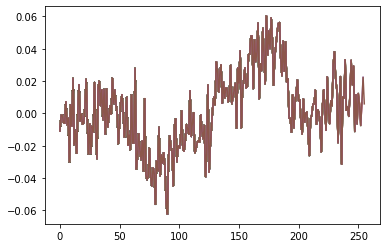

ラウンド鍵(2進):10101101
ラウンド鍵(16進):ad

[ラウンド鍵8の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

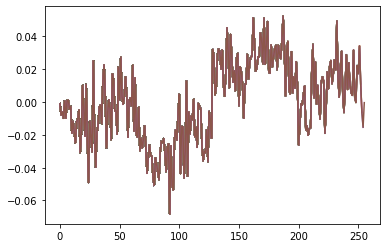

ラウンド鍵(2進):10111011
ラウンド鍵(16進):bb

[ラウンド鍵9の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

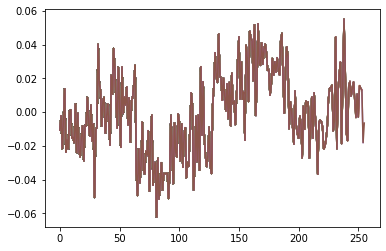

ラウンド鍵(2進):11101110
ラウンド鍵(16進):ee

[ラウンド鍵10の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

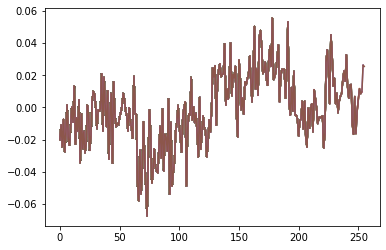

ラウンド鍵(2進):10110010
ラウンド鍵(16進):b2

[ラウンド鍵11の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

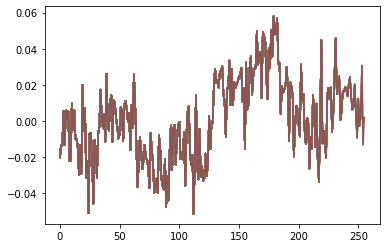

ラウンド鍵(2進):10110011
ラウンド鍵(16進):b3

[ラウンド鍵12の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

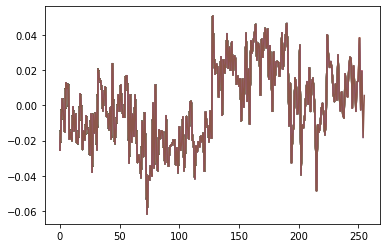

ラウンド鍵(2進):10000000
ラウンド鍵(16進):80

[ラウンド鍵13の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

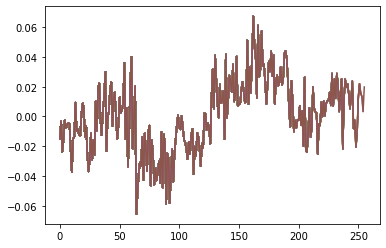

ラウンド鍵(2進):10100010
ラウンド鍵(16進):a2

[ラウンド鍵14の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

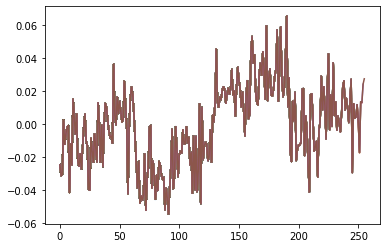

ラウンド鍵(2進):10111110
ラウンド鍵(16進):be

[ラウンド鍵15の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

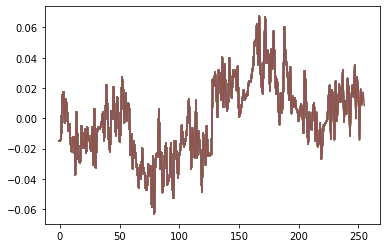

ラウンド鍵(2進):10100111
ラウンド鍵(16進):a7

[ラウンド鍵16の推定]


  0%|          | 0/256 [00:00<?, ?it/s]

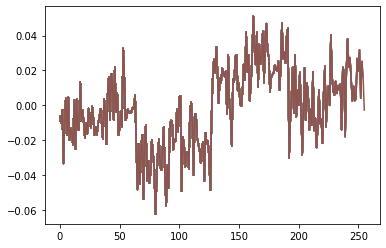

ラウンド鍵(2進):10100010
ラウンド鍵(16進):a2

暗号鍵:a1abaca7b1a0adbbeeb2b380a2bea7a2


In [ ]:
#簡易版　相関電力解析
import itertools
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from scipy.spatial import distance
     
#平文
plaintext = [list(i) for i in itertools.product([0, 1], repeat=8)]

#8bit予測鍵の生成
pre_round_key = [list(i) for i in itertools.product([0, 1], repeat=8)]

#予測鍵の個数
pre_round_key_number = len(pre_round_key) #8bit予測鍵は256個

#推定するラウンド鍵の個数
round_key_number = 16

#トレース観測回数
obs_trace_times = 5000
     
#リーケージモデル
def leakage_model(plaintext, pre_round_key):
      leakage = distance.hamming(pre_round_key,plaintext) + np.random.rand()
      return leakage
    
#相関電力解析
def cpa(pre_round_key, plaintext):
  correlation = []
  result_correlation = []
  for i in tqdm(range(pre_round_key_number)):
    pre_trace = []
    dumy_obs_trace = []
    for j in range(obs_trace_times):

      #予測トレースの生成
      pre_trace.append(leakage_model(pre_round_key[i], plaintext[j%256]))
      #ダミー観測トレースの生成
      dumy_obs_trace.append(leakage_model(pre_round_key[np.random.randint(100,200)], plaintext[j%256]))

    #相関係数の導出
    correlation.append(np.corrcoef(pre_trace, dumy_obs_trace))
    #相関係数の取得
    result_correlation.append(correlation[i][1][0])

    #解析毎の相関係数のプロット
    plt.plot(result_correlation)
  plt.show()

  #相関係数を用いたラウンド鍵の特定
  round_key_index = np.argmax(result_correlation)
  round_key = pre_round_key[round_key_index]
  
  #ラウンド鍵の表示
  hex_cal = 0
  for j in range(len(round_key)):
    hex_cal += round_key[j]*2**(len(round_key)-1-j)
  result_hex = format(hex_cal, 'x') #2進数→16進数

  if len(result_hex) == 1:
    result_hex += "0" #二桁目に0をパディング
  result_bin = "".join(map(str,round_key))

  print(f"ラウンド鍵(2進):{result_bin}")
  print(f"ラウンド鍵(16進):{result_hex}\n")
  return result_hex

#実行
round_key_list = []
for i in range(round_key_number):
  print(f"[ラウンド鍵{i+1}の推定]")
  round_key_list.append(cpa(pre_round_key, plaintext)) 
print(f"暗号鍵:{''.join(round_key_list)}")